In [ ]:
from gensim.summarization.summarizer import summarize
from gensim.summarization.textcleaner import split_sentences
import re

#reg_ex = r'[^a-zA-Z]'
#replace = ' '
piece = input("Enter text to be summarized: ").replace('\n', ' ').replace('\r', ' ')
#piece = input("Enter text to be summarized: ").replace('\n\r', ' ').strip()
#piece = piece.replace(reg_ex, replace)
piece = re.sub(' +', ' ', piece)
#print(split_sentences(piece))
#comp_df.apply(lambda t: ' '.join([wordnet_lemmatizer.lemmatize(w) for w in t.split()])).str.lower()
print('++++++++++++++++++++++++++++++++++++++')
print(summarize(piece, ratio=0.4)) # high enough for abstracts with longer sentences!

In [ ]:
# another summarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

def _create_frequency_table(text_string) -> dict:

    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

def _score_sentences(sentences, freqTable) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:10] in sentenceValue:
                    sentenceValue[sentence[:10]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:10]] = freqTable[wordValue]

        sentenceValue[sentence[:10]] = sentenceValue[sentence[:10]] // word_count_in_sentence

    return sentenceValue

def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = int(sumValues / len(sentenceValue))

    return average

def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

text = '''Purpose To evaluate moderate (grade 2, hemoglobin <10 g/dl) and severe
    (grade 3+, hemoglobin <8 g/dl) anemia as potential risk factors for DDR in the
    first line course of chemotherapy. While chemotherapy-induced neutropenia has been
    shown to be associated with dose delay/reduction (DDR) in several studies, the effect
    of anemia is less well studied. Methods We identified 3955 Kaiser Permanente patients
    diagnosed with incident non-Hodgkin’s lymphoma (n = 574), breast (n = 2043), lung (n = 463),
    gastric (n = 113), ovarian (n = 204), or colorectal cancers (n = 558) between 2010 and 2012.
    Generalized linear mixed effects models were used to study the effect of anemia in subsequent
    cycles, adjusting for demographics, comorbidities, chemotherapy cycle, neutropenia, thrombocytopenia,
    and liver and renal function. Results We found that moderate (grade 2) to severe (grade 3–4)
    anemia increased the risk of DDR in subsequent chemotherapy cycles [odds ratio (OR) = 1.46,
    95 % CI (1.32, 1.62) and OR = 2.02 (1.41, 2.89)], respectively, compared to grade 1 or no anemia.
    Both stage I–III and IV patients with grade 2 or greater anemia were at higher risk for DDR than
    patients with grade 1 or no anemia [ORstage IV, grade 2 = 1.94 (1.58, 2.38); ORstage IV,
    grade 3/4 = 2.83 (1.42, 5.62) and ORstage I–III, grade 2 = 1.33 (1.18, 1.49); ORstage I–III,
    grade 3–4 = 1.81 (1.18, 2.76)]. Conclusions These results provide insight into novel risk factors
    for chemotherapy dose modification that may inform clinicians on management strategies
    to optimize treatment outcomes.'''

# 1 Create the word frequency table
freq_table = _create_frequency_table(text)

'''
We already have a sentence tokenizer, so we just need 
to run the sent_tokenize() method to create the array of sentences.
'''

# 2 Tokenize the sentences
sentences = sent_tokenize(text)

# 3 Important Algorithm: score the sentences
sentence_scores = _score_sentences(sentences, freq_table)

# 4 Find the threshold
threshold = _find_average_score(sentence_scores)

# 5 Important Algorithm: Generate the summary
summary = _generate_summary(sentences, sentence_scores, 2.8 * threshold) # the higher the multiplier the shorter

print(summary)

In [ ]:
# test 3: read study protocol and summarize
from gensim.summarization.summarizer import summarize
import os
import PyPDF2
import re
#import subprocess

def read1k():
    return f.read(1024)

def read_in_chunks(infile, chunk_size=1024*64):
    '''read file in chunks via iterator'''
    chunk = infile.read(chunk_size)
    while chunk:
        yield chunk
        chunk = infile.read(chunk_size)

def process_data(chunk, text):
    text.append(str(chunk)) # 'utf8' codec can't decode byte 0xc3

def loadids():
    '''load id-title list'''
    with open('bsc_idlst0.txt', encoding="utf-8") as f:
        data = json.load(f)
    return data

def chunks(l, n):
    '''Yield successive n-sized chunks from list l'''
    for i in range(0, len(l), n):
        yield l[i:i + n] # returns a generator

def chunksep(l, s):
    '''Yield successive chunks from list l separated by s'''
    g = []
    for el in l:
        if el == s:
            yield g
            g = []
        g.append(el)
    yield g

def __unicode__(self):
    return unicode(self.some_field) or u''

def save_corpus(txt): # save corpus
    # save corpus as separate file
    os.chdir(r'C:\Users\Bernie\Documents\ML4D\lrgtxt0') # change this directory to save to a different location
    fout = open('bsc_pdf_corpus0.txt', 'w')
    fout.write(txt) # requires a string
    fout.close()

def main():
    #os.chdir(r'C:\Users\bscho\Desktop\NVS StudPro Summ') # all pdf-files in this directory will be processed
    # get all pdf filenames
    #pdfFiles = []
    #for filename in os.listdir('.'):
        #if filename.endswith('.pdf'):
            #pdfFiles.append(filename)
    #pdfFiles.sort(key = str.lower)
    
    #subprocess.call(['pdftotext', 'forms.pdf', 'output'])
    
    #outtext = ''
    #print(pdfFiles)
    #for pdfFileObj in pdfFiles:
        #pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        #npgs = pdfReader.numPages
        ##print('pages read:', npgs)
        #for i in range(npgs):
            #pageObj = pdfReader.getPage(i) # get a page object (pages are 0-based)
            #print(pageObj.extractText()[:20]) # get the text
            #outtext += str(pageObj.extractText().encode('utf-8'))
            #outtext += pageObj.extractText()
    #print(outtext[:500])
    #save_corpus(outtext)
    #print('%s' % (summarize(corpus[atxidx:nxtid]))) # auto-summarize results
    
    summratio = 0.25 # summary ratio for auto-summarizer
    
    os.chdir(r'C:\Users\bscho\Desktop\NVS StudPro Summ') # change this directory to save to a different location
    fin = open('studsumm0 raw.txt', encoding="utf-8")
    
    # chapter headings: match newline - number - whitespaces - title
    chptr_plst = ['\s\d+\s+Introduction\s', '\s\d+\s+Objectives and endpoints', '\s\d+\s+Study design', '\s\d+\s+Rationale'\
                  , '\s\d+\s+Population', '\s\d+\s+Treatment', '\s\d+\s+Informed consent procedures'\
                  , '\s\d+\s+Visit schedule and assessments', '\s\d+\s+Study discontinuation and completion'\
                  , '\s\d+\s+Safety monitoring and reporting', '\s\d+\s+Data Collection and Database management'\
                  , '\s\d+\s+Data analysis and statistical methods'\
                  , '\s\d+\s+Ethical considerations and administrative procedures', '\s\d+\s+Protocol adherence'\
                  , '\s\d+\s+References', '\s\d+\s+Appendices']
    
    text = ''
    pattern0 = r"\d+\.\d+\.\d+\.\d+\.\d+ [A-Z]|\d+\.\d+\.\d+\.\d+ [A-Z]|\d+\.\d+\.\d+ [A-Z]|[1-9]\.\d+ [A-Z]" # |=or pattern match
    for piece in read_in_chunks(fin): # compile text from file
        #text += piece.replace('\n', ' ').replace('\r', ' ')
        text += piece
        
    # remove page numbers and footer
    patternpg = r'Novartis Confidential Page \d+'
    text = re.sub(patternpg, '', text)
    
    #maincptdict = {}
    seplst = [] # chapter separation list
    
    # for each chapter
    for cpat in chptr_plst:
        #print(re.findall(cpat, text))
        for ctr, chdr in enumerate(re.finditer(re.compile(cpat), text)):
            #print(ctr, ': ', chdr)
            #maincptdict[cpat] = chdr.span()
            seplst.append(chdr.span()) # from start position to start position
            #print(text[chdr.span()[0]:chdr.span()[1]])
    #seplst.append((seplst[len(seplst)-1][0], len(text))) # add the final separator (for the last chapter)
    seplst = sorted(seplst, key=lambda tup: tup[0])
            
    #print(maincptdict)
    #print(seplst)
    #for ctup in seplst:
        #print(text[ctup[0]:ctup[1]])
    
    subclst = [] # subchapter separation list
    for cidx in range(len(seplst) - 1): # main chapters split
        thisclst = []
        #print('find subchapter in: ', seplst[cidx][0], seplst[cidx+1][1])
        for ctr, chptr in enumerate(re.finditer(pattern0, text[seplst[cidx][0]:seplst[cidx+1][1]])):
            #print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
            #thisclst.append(chptr.span()[0]) # tuple of start and end positions
            # need to consider match offset !
            thisclst.append((chptr.span()[0]+seplst[cidx][0], chptr.span()[1]+seplst[cidx][1])) # tuple of start and end positions
        if len(thisclst) > 0: # need to append a final entry to cover text from last match to end of chapter
            thisclst.append((thisclst[len(thisclst) - 1][1], seplst[cidx+1][0]))
        else:
            thisclst.append((seplst[cidx][0], seplst[cidx+1][0])) # the subchapter is the same as the chapter
        subclst.append(thisclst) # subclst is a list of chapters, for each chapter a list of tuples for the subtitle matches
            
    
    #print(subclst)
    #for sc in subclst:
        #print('chptr')
        #for ctup in sc:
            #print(text[ctup[0]:ctup[1]])
    
    ctr = 0
    for cidx in range(len(seplst) - 1):
        #print('section: ', ctr, 'for main index ', cidx)
        ctr += 1
        if len(subclst[cidx]) > 1:
            for scidx in range(len(subclst[cidx]) - 1): # number of separations of chapter by subchapters
                if subclst is not []:
                    ctitle = text[subclst[cidx][scidx][0]:subclst[cidx][scidx][1]+10] # the tuple holds the span of the title
                    chptr = text[subclst[cidx][scidx][1]:subclst[cidx][scidx+1][1]]
                    chptr = chptr.replace('\n', ' ').replace('\r', ' ')
                    #print('chptr: ', ctitle, subclst[cidx][scidx], subclst[cidx][scidx+1])
                    if len(chptr) > 10 and chptr.find('.') > 0:
                        #print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
                        print('chptr: ', ctitle)
                        try:
                            print(summarize(chptr, ratio=summratio))
                            print()
                        except ValueError:
                            pass
        else: # there is just one subchapter (the chapter itself)
            #print('sub', subclst[cidx])
            #print('***********', text[subclst[cidx][0][0]:subclst[cidx][0][1]])
            ctitle = text[subclst[cidx][0][0]:subclst[cidx][0][1]+10] # the tuple holds the span of the title
            if cidx >= len(subclst) - 1:
                return 0
            chptr = text[subclst[cidx][0][1]:subclst[cidx+1][0][0]]
            chptr = chptr.replace('\n', ' ').replace('\r', ' ')
            if len(chptr) > 50 and chptr.find('.') > 0:
                #print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
                print('chptr: ', ctitle)
                try:
                    print(summarize(chptr, ratio=summratio))
                    print()
                except ValueError:
                    pass          
            
    # fetch chapters
    #for ctr, subchdr in enumerate(re.finditer(pattern0, text[chdr.span[0]:chdr.span[0]])):
        #print(ctr, ': ', subchdr) 
        
    #text += ' ' + summarize(piece, ratio=0.1)
    #print(text)
    
    '''for cidx in range(len(seplst) - 1): # main chapters split
        chpt_txt = re.split(pattern0, text[seplst[cidx]:seplst[cidx+1]])
        #print(chpt_txt)
        for ctr, chptr in enumerate(chpt_txt):
        #for ctr, chptr in enumerate(re.finditer(pattern0, text[seplst[cidx]:seplst[cidx+1]])):
            print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
            if len(chptr) > 100 and chptr.find('.') > 0:
                print('section: ', ctr, 'for main index ', seplst[cidx], ' : ', chptr_plst[cidx // 2][8:])
                #print(chptr.match())
                try:
                    print(summarize(chptr, ratio=0.2))
                except ValueError:
                    #print(chptr)
                    pass'''
    
if __name__=="__main__": 
    main()

In [3]:
# Hellinger metric and Jaccard index
import math
import numpy as np

def l1_norm(v):
    '''L1 distance'''
    norm = np.sum(v)
    return v / norm

def l2_norm(v):
    '''L2 distance'''
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

def hellingm(p, q):
    '''returns Hellinger metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    hm = 0.
    for idx, elp in enumerate(p):
        hm += (math.sqrt(elp) - math.sqrt(q[idx]))**2
    return math.sqrt(hm) / math.sqrt(2.)

def euclid(p, q):
    '''Euclidean metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** 2
    return math.sqrt(ec) 

def minkovfr(p, q, pp):
    '''Minkowski and fractional metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** pp
    return ec ** (1. / pp)

def cosine(p, q):
    '''cosine similarity for distributions p and q'''
    if len(p) != len(q):
        return -1
    cs = 0.
    pn = 0.
    qn = 0.
    for idx, elp in enumerate(p):
        cs += elp * q[idx]
        pn += elp * elp
        qn += q[idx] * q[idx]
    return math.sqrt(cs) / math.sqrt(pn) / math.sqrt(qn)

def jaccind(a, b):
    '''returns the Jaccard index for two sets a, b'''
    return len(a.intersection(b)) / len(a.union(b))

def main():
    X = np.array([[1., 2., 1],
              [2., 4., 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])
    
    print('helling:', hellingm([0.1, 0.8, 0.2, 0.], [0.0, 0.5, 0.7, 0.1]))
    print('euclid:', euclid([0.1, 0.8, 0.2, 0.], [0.0, 0.5, 0.7, 0.1]))
    print('cosine:', cosine([0.1, 0.8, 0.2, 0.], [0.0, 0.5, 0.7, 0.1]))
    print('jacc:', jaccind({1,2,3,4}, {2,3,4,5}))
    
    print()
    
    x0 = X[7][:-1]
    x1 = X[8][:-1]
    print("regular: ", x0, x1)
    print('helling:', hellingm(x0, x1))
    print('euclid:', euclid(x0, x1))
    print('cosine:', cosine(x0, x1))
    print('minkov p=4:', minkovfr(x0, x1, 4))
    print('fract p=0.2:', minkovfr(x0, x1, 0.2))
    
    print()
    x0_n = l1_norm(x0)
    x1_n = l1_norm(x1)
    print("L1-norm: ", x0_n, x1_n)
    print('helling:', hellingm(x0_n, x1_n))
    print('euclid:', euclid(x0_n, x1_n))
    print('cosine:', cosine(x0_n, x1_n))
    print('minkov p=4:', minkovfr(x0_n, x1_n, 4))
    print('fract p=0.2:', minkovfr(x0_n, x1_n, 0.2))       

    print()
    x0_n = l2_norm(x0)
    x1_n = l2_norm(x1)
    print("L2-norm: ", x0_n, x1_n)
    print('helling:', hellingm(x0_n, x1_n))
    print('euclid:', euclid(x0_n, x1_n))
    print('cosine:', cosine(x0_n, x1_n))
    print('minkov p=4:', minkovfr(x0_n, x1_n, 4))
    print('fract p=0.2:', minkovfr(x0_n, x1_n, 0.2))
    
if __name__=='__main__':
    main()

helling: 0.4397484841235158
euclid: 0.6
cosine: 1.0215078369104982
jacc: 0.6

regular:  [6.5 6.4] [6.3 5.8]
helling: 0.09034828719135093
euclid: 0.6324555320336764
cosine: 0.11311325139321936
minkov p=4: 0.6018433396869133
fract p=0.2: 11.42401086259046

L1-norm:  [0.50387597 0.49612403] [0.52066116 0.47933884]
helling: 0.011872914294613929
euclid: 0.02373784056260818
cosine: 1.413191532186627
minkov p=4: 0.019961065034961437
fract p=0.2: nan

L2-norm:  [0.71256682 0.70160425] [0.73569822 0.67730947]
helling: 0.014120475850765184
euclid: 0.0335454625980808
cosine: 0.9997186359018924
minkov p=4: 0.028225197377708088
fract p=0.2: nan


d:\anaconda\envs\venv\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
# text entropy
import math
import re

def uniqc(txt):
    '''return unique characters of given text'''
    return set(txt)

def entropy(txt):
    '''calclate information entropy of given text'''
    clst = uniqc(txt)
    ctlst = []
    for c in clst:
        ctlst.append(txt.count(c))
    res = 0.
    sct = sum(ctlst)
    for nc in ctlst:
        res -= nc * math.log(nc / sct)
    return res / math.log(2) / sct
        
def main():
    piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    #print(uniqc(piece))
    print(entropy(piece))

if __name__=='__main__':
    main()

Enter text: The extent and importance of autoimmune mechanisms in myelodysplastic syndrome (MDS) and the  role of immunosuppression in the treatment of this disease are not well defined. We report overrepresentation  of HLA-DR2 and its serologic split HLA-DR15 in both MDS and aplastic anemia (AA). Four clinically and ethnically  defined patient groups were analyzed. The HLA-DR15 antigen frequencies among North American white MDS patients  (n = 72) and AA patients (n = 59), who received immunosuppressive treatment at the National Institutes of Health  (NIH), were 36% and 42%, respectively. These antigen frequencies were significantly higher than that of the  control population of 240 North American white NIH blood donors typed for HLA antigens by the same molecular  technique (HLA-DR15, 21.3%, P =.01 for MDS, P <.001 for AA). Among North American white patients reported in the  International Bone Marrow Transplant Registry (IBMTR), 30% of 341 MDS patients and 33% of 364 AA patients were

In [ ]:
# robot on grid
import random
import numpy as np
import matplotlib.pyplot as plt

def robmv(n):
    '''n random moves along x,y, not diag'''
    mdir = ((1,0), (0,1), (-1,0), (0,-1))
    res = [0,0]
    for i in range(n):
        thismv = random.choice(mdir)
        res[0] += thismv[0]
        res[1] += thismv[1]
    return res

def main():
    nsteps = 16
    data = np.zeros((2*nsteps+1, 2*nsteps+1))
    for i in range(20000):
        thismv = robmv(nsteps)
        #print(thismv)
        data[thismv[0]+nsteps, thismv[1]+nsteps] += 1
    data /= np.sum(data)
    plt.imshow(data)
    plt.show()
    #print(data)

if __name__=='__main__':
    main()

In [ ]:
# byte pair encoding (BPE) test
import re
from collections import Counter, defaultdict

def vocab_cts(corpus: str) -> dict: # -> function annotation e.g. annotate parameters with their expected types
    """vocab with counts from corpus"""
    # Separate each char in word by space and add mark end of token
    tokens = [" ".join(word) + " </w>" for word in corpus.split()]
    vocab = Counter(tokens) # count frequency of tokens in corpus, counter is provided to support convenient, rapid tallies
    return vocab

def ct_prs(vocab: dict) -> dict:
    """count pairs of consecutive symbols"""
    pairs = defaultdict(int) # dict subclass that calls a factory function to supply missing values
    for word, frequency in vocab.items():
        symbols = word.split() # split word into its symbols
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += frequency # counting up occurrences of pairs
    return pairs

def merge_vocab(pair: tuple, v_in: dict) -> dict:
    """merge all occurrences of the most frequent pairs"""
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word) # replace most frequent pair in all vocabulary
        v_out[w_out] = v_in[word]
    return v_out

corpus = '''The extent and importance of autoimmune mechanisms in myelodysplastic syndrome (MDS) and the 
role of immunosuppression in the treatment of this disease are not well defined. We report overrepresentation 
of HLA-DR2 and its serologic split HLA-DR15 in both MDS and aplastic anemia (AA). Four clinically and ethnically 
defined patient groups were analyzed. The HLA-DR15 antigen frequencies among North American white MDS patients 
(n = 72) and AA patients (n = 59), who received immunosuppressive treatment at the National Institutes of Health 
(NIH), were 36% and 42%, respectively. These antigen frequencies were significantly higher than that of the 
control population of 240 North American white NIH blood donors typed for HLA antigens by the same molecular 
technique (HLA-DR15, 21.3%, P =.01 for MDS, P <.001 for AA). Among North American white patients reported in the 
International Bone Marrow Transplant Registry (IBMTR), 30% of 341 MDS patients and 33% of 364 AA patients were 
positive for HLA-DR2. These antigen frequencies were higher than those reported for the general North American 
white population (HLA-DR2, 25.3%, P =.089 for MDS, P =.01 for AA). The DR15 and DR2 frequencies were significantly 
increased in MDS refractory anemia (RA) (P =.036 and P =.01, respectively) but not MDS refractory anemia with 
excess blasts. In the NIH MDS patients, HLA-DR15 was significantly associated with a clinically relevant 
response to antithymocyte globulin (ATG) or cyclosporine immunosuppression (multivariate analysis, P =.008). 
In MDS with RA, DR15 may be useful as a guide to pathophysiology, prognosis, and treatment.'''

vocab = vocab_cts(corpus)  # Step 1

num_merges = 100  # Hyperparameter
for i in range(num_merges):
    pairs = ct_prs(vocab)  # Step 2
    if not pairs:
        break
    # step 3
    best = max(pairs, key=pairs.get) # gets the key with the maximum value
    vocab = merge_vocab(best, vocab)
    
print(vocab)

In [ ]:
# multiple regression
import numpy as np
 
height = [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63,
    1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83]
weight = [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93,
    61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46]
 
X = np.mat(height**np.arange(3)[:, None])
y = np.mat(weight)
 
print(y * X.T * (X*X.T).I)

In [5]:
# BPE test 2
from collections import Counter, defaultdict
from gensim.parsing.preprocessing import preprocess_string

def ctprs(txt, ex_sp=False) -> dict:
    '''count symbol pair frequencies'''
    pairs = defaultdict(int)
    for i in range(len(txt) - 1):
        if ex_sp:
            if txt[i] == ' ' or txt[i+1] == ' ':
                continue
        pairs[txt[i], txt[i+1]] += 1
    return pairs

def main():
    piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    corpus = ' '.join(preprocess_string(piece))
    print(corpus)
    mcp = Counter(ctprs(corpus, True)).most_common(10)
    print(mcp)
    cmm_prs = [''.join(x) for x, ctr in mcp]
    print('most common pairs:', cmm_prs)
    for cp in cmm_prs:
        #corpus = corpus.replace(cp, ' ' + cp + ' ')
        corpus = corpus.replace(cp, ' ')
    print('separate out common pairs:', corpus)
 
    mcp = Counter(ctprs(corpus, True)).most_common(10)
    print(mcp)
    cmm_prs = [''.join(x) for x, ctr in mcp]
    print('most common pairs:', cmm_prs)
    for cp in cmm_prs:
        #corpus = corpus.replace(cp, ' ' + cp + ' ')
        corpus = corpus.replace(cp, ' ')
    print('separate out common pairs:', corpus)
    
    mcp = Counter(ctprs(corpus, True)).most_common(10)
    print(mcp)
    cmm_prs = [''.join(x) for x, ctr in mcp]
    print('most common pairs:', cmm_prs)
    for cp in cmm_prs:
        #corpus = corpus.replace(cp, ' ' + cp + ' ')
        corpus = corpus.replace(cp, ' ')
    print('separate out common pairs:', corpus)
    
    for cp in cmm_prs:
        corpus = corpus.replace(' ' + cp + ' ', cp)
    print('translated back:', corpus)
        
if __name__=='__main__':
    main()

Enter text: The extent and importance of autoimmune mechanisms in myelodysplastic syndrome (MDS) and the  role of immunosuppression in the treatment of this disease are not well defined. We report overrepresentation  of HLA-DR2 and its serologic split HLA-DR15 in both MDS and aplastic anemia (AA). Four clinically and ethnically  defined patient groups were analyzed. The HLA-DR15 antigen frequencies among North American white MDS patients  (n = 72) and AA patients (n = 59), who received immunosuppressive treatment at the National Institutes of Health  (NIH), were 36% and 42%, respectively. These antigen frequencies were significantly higher than that of the  control population of 240 North American white NIH blood donors typed for HLA antigens by the same molecular  technique (HLA-DR15, 21.3%, P =.01 for MDS, P <.001 for AA). Among North American white patients reported in the  International Bone Marrow Transplant Registry (IBMTR), 30% of 341 MDS patients and 33% of 364 AA patients were

In [1]:
# power sets
def pwsts(s):
    '''power sets of s'''
    if not s:
        return [[]]
    return pwsts(s[1:]) + [[s[0]] + x for x in pwsts(s[1:])]

def main():
    print(pwsts([0,1]))

if __name__=='__main__':
    main()

[[], [1], [0], [0, 1]]


In [18]:
# combination and permutation
def nperm(n, k):
    '''n permutation'''
    res = 1
    for i in range(n-k+1, n+1):
        res *= i
    return res

def ncomb(n, k):
    '''n combinations'''
    res = nperm(n, k)
    for i in range(1, k+1):
        res /= i
    return res

def main():
    print(nperm(3,2))
    print(ncomb(3,3))

if __name__=='__main__':
    main()

6
1.0


In [21]:
# exp g tst
def egrth(n0, n1, t2):
    '''how long from n0 to n1 w/o ln'''
    tres = 0
    while n0 < n1:
        n0 *= 2
        tres += t2
    return tres

def main():
    print(egrth(1634, 8500000, 2))

if __name__=='__main__':
    main()

26


In [28]:
# BPE test 3
from collections import Counter, defaultdict
from gensim.parsing.preprocessing import preprocess_string
import re

def ctprs(txt, ex_sp=False) -> dict:
    '''count symbol pair frequencies'''
    pairs = defaultdict(int)
    for i in range(len(txt) - 1):
        if ex_sp:
            if txt[i] == ' ' or txt[i+1] == ' ':
                continue
        pairs[txt[i], txt[i+1]] += 1
    return pairs

def main():
    piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    corpus = ' '.join(preprocess_string(piece))
    print(corpus)
    mcp = Counter(ctprs(corpus, True)).most_common(20)
    print(mcp)
    cmm_prs = [''.join(x) for x, ctr in mcp]
    print('most common pairs:', cmm_prs)
    for cp in cmm_prs:
        #corpus = corpus.replace(cp, ' ' + cp + ' ')
        corpus = re.sub(r'\w+\w+' + cp + r'\w+\w+', ' ' + cp + ' ', corpus) # only replace if no single characters left
    print('separate out common pairs:', corpus)
    
    #for cp in cmm_prs:
        #corpus = corpus.replace(' ' + cp + ' ', cp)
    #print('translated back:', corpus)
        
if __name__=='__main__':
    main()

Enter text: The extent and importance of autoimmune mechanisms in myelodysplastic syndrome (MDS) and the  role of immunosuppression in the treatment of this disease are not well defined. We report overrepresentation  of HLA-DR2 and its serologic split HLA-DR15 in both MDS and aplastic anemia (AA). Four clinically and ethnically  defined patient groups were analyzed. The HLA-DR15 antigen frequencies among North American white MDS patients  (n = 72) and AA patients (n = 59), who received immunosuppressive treatment at the National Institutes of Health  (NIH), were 36% and 42%, respectively. These antigen frequencies were significantly higher than that of the  control population of 240 North American white NIH blood donors typed for HLA antigens by the same molecular  technique (HLA-DR15, 21.3%, P =.01 for MDS, P <.001 for AA). Among North American white patients reported in the  International Bone Marrow Transplant Registry (IBMTR), 30% of 341 MDS patients and 33% of 364 AA patients were

In [1]:
# two players picking numbers
def calln(n, nlst):
    return nlst[n]

def playgm(n, lim):
    picks = range(1, n)
    tot = 0
    n0 = 0
    n1 = 1
    while tot < lim:
        tot += calln(n0, picks)
        if tot >= lim:
            return 1
        tot += calln(n1, picks)
    return 0
    
def main():
    print(playgm(3, 21))
    
if __name__=='__main__':
    main()

0


In [2]:
from concurrent import futures
from math import floor, sqrt
 
NUMBERS = [
    112272537195293,
    112582718962171,
    112272537095293,
    115280098190773,
    115797840077099,
    1099726829285419]
# NUMBERS = [33, 44, 55, 275]
 
def lowest_factor(n, _start=3):
    if n % 2 == 0:
        return 2
    search_max = int(floor(sqrt(n))) + 1
    for i in range(_start, search_max, 2):
        if n % i == 0:
            return i
    return n
 
def prime_factors(n, lowest):
    pf = []
    while n > 1:
        pf.append(lowest)
        n //= lowest
        lowest = lowest_factor(n, max(lowest, 3))
    return pf
 
def prime_factors_of_number_with_lowest_prime_factor(NUMBERS):
    with futures.ProcessPoolExecutor() as executor:
        low_factor, number = max( (l, f) for l, f in zip(executor.map(lowest_factor, NUMBERS), NUMBERS) )
        all_factors = prime_factors(number, low_factor)
        return number, all_factors
 
 
def main():
    print('For these numbers:')
    print('\n  '.join(str(p) for p in NUMBERS))
    number, all_factors = prime_factors_of_number_with_lowest_prime_factor(NUMBERS)
    print('    The one with the largest minimum prime factor is {}:'.format(number))
    print('      All its prime factors in order are: {}'.format(all_factors))
 
if __name__ == '__main__':
    main()

For these numbers:
112272537195293
  112582718962171
  112272537095293
  115280098190773
  115797840077099
  1099726829285419


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [39]:
# various norms and distances
import math
import numpy as np

def l1_norm(v):
    '''L1 distance'''
    norm = np.sum(v)
    return v / norm

def l2_norm(v):
    '''L2 distance'''
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

def froto(p, q):
    '''vector from p to q'''
    return np.array(p) - np.array(q)

def hellingm(p, q):
    '''returns Hellinger metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    hm = 0.
    for idx, elp in enumerate(p):
        hm += (math.sqrt(elp) - math.sqrt(q[idx]))**2
    return math.sqrt(hm) / math.sqrt(2.)

def euclid(p, q):
    '''Euclidean metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** 2
    return math.sqrt(ec) 

def minkovfr(p, q, pp):
    '''Minkowski and fractional metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** pp
    return ec ** (1. / pp)

def cosine(p, q):
    '''cosine similarity for distributions p and q'''
    if len(p) != len(q):
        return -1
    cs = 0.
    pn = 0.
    qn = 0.
    for idx, elp in enumerate(p):
        cs += elp * q[idx]
        pn += elp * elp
        qn += q[idx] * q[idx]
    return math.sqrt(cs) / math.sqrt(pn) / math.sqrt(qn)

def jaccind(a, b):
    '''returns the Jaccard index for two sets a, b'''
    return len(a.intersection(b)) / len(a.union(b))

def kullei(p, q):
    '''Kullback-Leibler divergence'''
    return np.sum(np.dot(p, np.log(p / q)))

def main():
    X = np.array([[1., 2., 1],
              [2., 4., 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])
    
    x0 = X[1][:-1]
    x1 = X[4][:-1]
    print("regular: ", x0, x1)
    print('L1: ', l1_norm(froto(x0, x1)))
    print('L2: ', l2_norm(froto(x0, x1)))
    print('dot: %2.2f' %(np.dot(x0, x1)))
    print('helling: %2.2f' %(hellingm(x0, x1)))
    print('euclid: %2.2f' %(euclid(x0, x1)))
    print('cosine: %2.2f' %(cosine(x0, x1)))
    print('minkov p=4: %2.2f' %(minkovfr(x0, x1, 4)))
    print('fract p=0.4: %2.2f' %(minkovfr(x0, x1, 0.4)))
    print('jaccind: %2.2f' %(jaccind(set(x0), set(x1))))
    print('KL: %2.2f' %(kullei(x0, x1)))
    
if __name__=='__main__':
    main()

regular:  [2. 4.] [1.3 2.7]
L1:  [0.35 0.65]
L2:  [0.47409982 0.8804711 ]
dot: 13.40
helling: 0.32
euclid: 1.48
cosine: 0.27
minkov p=4: 1.33
fract p=0.4: 5.50
jaccind: 0.00
KL: 2.43


In [2]:
# Auri examples
import random

def dist():
    dfact = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
    dnms = ['km', '100m', '10m', 'm', 'dm', 'cm', 'mm']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 4), dnms[i1])

def area():
    dfact = [1000000, 10000, 100, 1, 0.01, 0.0001, 0.000001]
    dnms = ['km2', 'ha', 'a', 'm2', 'dm2', 'cm2', 'mm2']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 6), dnms[i1])

def vol():
    dfact = [1000000000, 1000000, 1000, 1, 0.001, 0.000001, 0.000000001]
    dnms = ['km3', '1000000m3', '1000m3', 'm3', 'dm3', 'cm3', 'mm3']
    i0 = random.randint(0, len(dfact)-1)
    i1 = random.randint(0, len(dfact)-1)
    n0 = round(random.randint(5, 100) / random.randint(1, 20), 2)
    return (n0, dnms[i0], round(n0 * dfact[i0] / dfact[i1], 8), dnms[i1])

def main():
    for i in range(10):
        print(dist())
    print()
    for i in range(10):
        print(area())
    print()
    for i in range(10):
        print(vol())

if __name__=='__main__':
    main()

(4.67, 'km', 4.67, 'km')
(9.5, '10m', 950.0, 'dm')
(6.07, 'dm', 60.7, 'cm')
(4.67, 'mm', 0.0, 'km')
(17.33, 'cm', 0.0173, '10m')
(1.58, 'cm', 0.158, 'dm')
(1.72, 'km', 17.2, '100m')
(0.85, 'km', 8.5, '100m')
(0.64, 'km', 0.64, 'km')
(7.07, 'm', 0.0707, '100m')

(46.5, 'mm2', 0.0, 'km2')
(9.38, 'km2', 938000000.0, 'dm2')
(3.67, 'cm2', 3.67, 'cm2')
(3.53, 'dm2', 4e-06, 'ha')
(2.55, 'm2', 255.0, 'dm2')
(6.27, 'km2', 627.0, 'ha')
(20.0, 'dm2', 2e-05, 'ha')
(4.2, 'dm2', 420.0, 'cm2')
(11.88, 'a', 11.88, 'a')
(9.0, 'cm2', 9e-06, 'a')

(8.22, 'mm3', 0.00822, 'cm3')
(35.0, '1000000m3', 35000000.0, 'm3')
(50.0, 'mm3', 0.05, 'cm3')
(12.0, 'mm3', 0.0, '1000m3')
(1.75, 'km3', 1750000000.0, 'm3')
(24.0, '1000000m3', 24000000000000.0, 'cm3')
(13.5, 'cm3', 1.35e-05, 'm3')
(25.0, 'cm3', 0.0, 'km3')
(6.2, 'mm3', 0.0, '1000m3')
(4.71, 'mm3', 0.0, 'm3')


In [3]:
# topological sort
try:
    from functools import reduce
except:
    pass
 
data = {
    'des_system_lib':   set('std synopsys std_cell_lib des_system_lib dw02 dw01 ramlib ieee'.split()),
    'dw01':             set('ieee dw01 dware gtech'.split()),
    'dw02':             set('ieee dw02 dware'.split()),
    'dw03':             set('std synopsys dware dw03 dw02 dw01 ieee gtech'.split()),
    'dw04':             set('dw04 ieee dw01 dware gtech'.split()),
    'dw05':             set('dw05 ieee dware'.split()),
    'dw06':             set('dw06 ieee dware'.split()),
    'dw07':             set('ieee dware'.split()),
    'dware':            set('ieee dware'.split()),
    'gtech':            set('ieee gtech'.split()),
    'ramlib':           set('std ieee'.split()),
    'std_cell_lib':     set('ieee std_cell_lib'.split()),
    'synopsys':         set(),
    }
 
def toposort2(data):
    for k, v in data.items():
        v.discard(k) # Ignore self dependencies
    extra_items_in_deps = reduce(set.union, data.values()) - set(data.keys())
    data.update({item:set() for item in extra_items_in_deps})
    while True:
        ordered = set(item for item, dep in data.items() if not dep)
        if not ordered:
            break
        yield ' '.join(sorted(ordered))
        data = {item: (dep - ordered) for item, dep in data.items() if item not in ordered}
    assert not data, "A cyclic dependency exists amongst %r" % data
 
print ('\n'.join( toposort2(data) ))

ieee std synopsys
dware gtech ramlib std_cell_lib
dw01 dw02 dw05 dw06 dw07
des_system_lib dw03 dw04


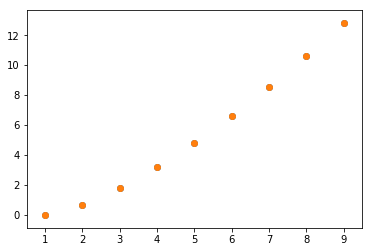

In [8]:
import math
import matplotlib.pyplot as plt

#print(math.log(math.factorial(5)))
xr = range(1,10)
y = [math.log(math.factorial(x)) for x in xr]
y1 = [sum([math.log(xx) for xx in range(1,x+1)]) for x in xr]
plt.scatter(xr, y)
plt.scatter(xr, y1)
plt.show()

No handles with labels found to put in legend.


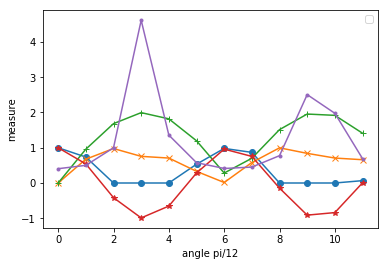

In [2]:
# various norms and distances graph
import math
import numpy as np
import matplotlib.pyplot as plt

def l1_norm(v):
    '''L1 distance'''
    norm = np.sum(v)
    return v / norm

def l2_norm(v):
    '''L2 distance'''
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

def froto(p, q):
    '''vector from p to q'''
    return np.array(p) - np.array(q)

def hellingm(p, q):
    '''returns Hellinger metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    hm = 0.
    for idx, elp in enumerate(p):
        hm += (math.sqrt(elp) - math.sqrt(max(q[idx], 0.)))**2
    return math.sqrt(hm) / math.sqrt(2.)

def euclid(p, q):
    '''Euclidean metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** 2
    return math.sqrt(ec) 

def minkovfr(p, q, pp):
    '''Minkowski and fractional metric for distributions p and q'''
    if len(p) != len(q):
        return -1
    ec = 0.
    for idx, elp in enumerate(p):
        ec += (elp - q[idx]) ** pp
    return ec ** (1. / pp)

def cosine(p, q):
    '''cosine similarity for distributions p and q'''
    if len(p) != len(q):
        return -1
    cs = 0.
    pn = 0.
    qn = 0.
    for idx, elp in enumerate(p):
        cs += elp * q[idx]
        pn += elp * elp
        qn += q[idx] * q[idx]
    if cs > 0. and pn > 0. and qn > 0.:
        return math.sqrt(cs) / math.sqrt(pn) / math.sqrt(qn)
    return 0

def jaccind(a, b):
    '''returns the Jaccard index for two sets a, b'''
    return len(a.intersection(b)) / len(a.union(b))

def kullei(p, q):
    '''Kullback-Leibler divergence (modified)'''
    return np.sum(np.dot(p, np.array([np.log(p / (q0 + 1) + 1) for q0 in q])))

def main():
    vx = np.array([1., 0.])
    xc = range(12)
    yc = []
    yh = []
    ye = []
    yd = []
    ykl = []
    for phi in range(0,12):
        vy = np.array([math.cos(phi), math.sin(phi)])
        yc.append(cosine(vx, vy))
        yh.append(hellingm(vx, vy))
        ye.append(euclid(vx, vy))
        yd.append(np.dot(vx, vy))
        ykl.append(kullei(vx, vy))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set(xlabel='angle pi/12', ylabel='measure')
    plt.plot(xc, yc, marker='o') # Cosine
    plt.plot(xc, yh, marker='x') # Helling
    plt.plot(xc, ye, marker='+') # Euclid
    plt.plot(xc, yd, marker='*') # dot
    plt.plot(xc, ykl, marker='.') # KL
    ax.legend(loc='best')
    plt.show()
    
if __name__=='__main__':
    main()

In [11]:
# test q,k,v-attention
import numpy as np

def softmax(x):
    """compute softmax values for each sets of scores in x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def main():
    q = np.array([[0.1, 0.2, 0.2]])
    k = np.array([[0.1, 0, 0.3], [0.1, 0.2, 0], [0, 0.2, 0.3]])
    v = np.array([[1., 0., 1.]])
    print(k)
    print(np.dot(q, k.T))
    print(softmax(np.dot(q, k.T)) * v)

if __name__=='__main__':
    main()

[[0.1 0.  0.3]
 [0.1 0.2 0. ]
 [0.  0.2 0.3]]
[[0.07 0.05 0.1 ]]
[[1. 0. 1.]]


In [14]:
import itertools

def analloc(d1, d2, a0, a1, a2, l0, l1):
    if (a0 + l0) % 2 == 0 and a2 + d2 < 10:
        res = ( int((a0 + l0) / 2), d1, d2, a0, a1, a2, l0, l1, d2 + a2)
        #if res[2] < res[1] or res[5] < res[4] or res[8] < res[7]:
            #return ()
        for i in range(1,10):
            if res.count(i) > 1:
                return ()
        return res
    return ()

def main():
    #print(analloc(1, 2, 3, 4, 5, 6, 7))
    #print(list(itertools.permutations(range(1,4))))
    for tpl in list(itertools.combinations(range(1,10), 7)):
        res = analloc(tpl[0], tpl[1], tpl[2], tpl[3], tpl[4], tpl[5], tpl[6])
        if len(res) > 0:
            print(res)
    
if __name__=='__main__':
    main()

(5, 1, 2, 3, 4, 6, 7, 9, 8)


In [17]:
#!/bin/python
import numpy as np
from scipy.ndimage.filters import convolve, gaussian_filter
from scipy.misc import imread, imshow
 
def CannyEdgeDetector(im, blur = 1, highThreshold = 91, lowThreshold = 31):
	im = np.array(im, dtype=float) #Convert to float to prevent clipping values
 
	#Gaussian blur to reduce noise
	im2 = gaussian_filter(im, blur)
 
	#Use sobel filters to get horizontal and vertical gradients
	im3h = convolve(im2,[[-1,0,1],[-2,0,2],[-1,0,1]]) 
	im3v = convolve(im2,[[1,2,1],[0,0,0],[-1,-2,-1]])
 
	#Get gradient and direction
	grad = np.power(np.power(im3h, 2.0) + np.power(im3v, 2.0), 0.5)
	theta = np.arctan2(im3v, im3h)
	thetaQ = (np.round(theta * (5.0 / np.pi)) + 5) % 5 #Quantize direction
 
	#Non-maximum suppression
	gradSup = grad.copy()
	for r in range(im.shape[0]):
		for c in range(im.shape[1]):
			#Suppress pixels at the image edge
			if r == 0 or r == im.shape[0]-1 or c == 0 or c == im.shape[1] - 1:
				gradSup[r, c] = 0
				continue
			tq = thetaQ[r, c] % 4
 
			if tq == 0: #0 is E-W (horizontal)
				if grad[r, c] <= grad[r, c-1] or grad[r, c] <= grad[r, c+1]:
					gradSup[r, c] = 0
			if tq == 1: #1 is NE-SW
				if grad[r, c] <= grad[r-1, c+1] or grad[r, c] <= grad[r+1, c-1]:
					gradSup[r, c] = 0
			if tq == 2: #2 is N-S (vertical)
				if grad[r, c] <= grad[r-1, c] or grad[r, c] <= grad[r+1, c]:
					gradSup[r, c] = 0
			if tq == 3: #3 is NW-SE
				if grad[r, c] <= grad[r-1, c-1] or grad[r, c] <= grad[r+1, c+1]:
					gradSup[r, c] = 0
 
	#Double threshold
	strongEdges = (gradSup > highThreshold)
 
	#Strong has value 2, weak has value 1
	thresholdedEdges = np.array(strongEdges, dtype=np.uint8) + (gradSup > lowThreshold)
 
	#Tracing edges with hysteresis	
	#Find weak edge pixels near strong edge pixels
	finalEdges = strongEdges.copy()
	currentPixels = []
	for r in range(1, im.shape[0]-1):
		for c in range(1, im.shape[1]-1):	
			if thresholdedEdges[r, c] != 1:
				continue #Not a weak pixel
 
			#Get 3x3 patch	
			localPatch = thresholdedEdges[r-1:r+2,c-1:c+2]
			patchMax = localPatch.max()
			if patchMax == 2:
				currentPixels.append((r, c))
				finalEdges[r, c] = 1
 
	#Extend strong edges based on current pixels
	while len(currentPixels) > 0:
		newPix = []
		for r, c in currentPixels:
			for dr in range(-1, 2):
				for dc in range(-1, 2):
					if dr == 0 and dc == 0: continue
					r2 = r+dr
					c2 = c+dc
					if thresholdedEdges[r2, c2] == 1 and finalEdges[r2, c2] == 0:
						#Copy this weak pixel to final result
						newPix.append((r2, c2))
						finalEdges[r2, c2] = 1
		currentPixels = newPix
 
	return finalEdges
 
if __name__=="__main__":
	im = imread("test.jpg", mode="L") #Open image, convert to greyscale
	finalEdges = CannyEdgeDetector(im)
	imshow(finalEdges)

d:\anaconda\envs\venv\lib\site-packages\ipykernel_launcher.py:84: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
d:\anaconda\envs\venv\lib\site-packages\ipykernel_launcher.py:86: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [1]:
def multisplit(text, sep):
    lastmatch = i = 0
    matches = []
    while i < len(text):
        for j, s in enumerate(sep):
            if text[i:].startswith(s):
                if i > lastmatch:
                    matches.append(text[lastmatch:i])
                matches.append((j, i))  # Replace the string containing the matched separator with a tuple of which separator and where in the string the match occured
                lastmatch = i + len(s)
                i += len(s)
                break
        else:
            i += 1
    if i > lastmatch:
        matches.append(text[lastmatch:i])
    return matches

if __name__=="__main__":
    print(multisplit('a!===b=!=c', ['==', '!=', '=']))
    print(multisplit('a!===b=!=c', ['!=', '==', '=']))

['a', (1, 1), (0, 3), 'b', (2, 6), (1, 7), 'c']
['a', (0, 1), (1, 3), 'b', (2, 6), (0, 7), 'c']


In [6]:
import math
from collections import Counter
 
def entropy(s):
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

if __name__=="__main__":
    print(entropy("1223334444"))

1.8464393446710154


In [8]:
# text entropy 2
import math
import re
from collections import Counter

def entropy(s):
    '''calclate information entropy of given text'''
    p, lns = Counter(s), float(len(s)) # Counter({'4': 4, '3': 3, '2': 2, '1': 1})
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())
        
def main():
    piece = input("Enter text: ").replace('\n', ' ').replace('\r', ' ')
    print('++++++++++++++++++++++++++++++++++++++')
    #print(uniqc(piece))
    print(entropy(piece))

if __name__=='__main__':
    main()

Enter text: The extent and importance of autoimmune mechanisms in myelodysplastic syndrome (MDS) and the  role of immunosuppression in the treatment of this disease are not well defined. We report overrepresentation  of HLA-DR2 and its serologic split HLA-DR15 in both MDS and aplastic anemia (AA). Four clinically and ethnically  defined patient groups were analyzed. The HLA-DR15 antigen frequencies among North American white MDS patients  (n = 72) and AA patients (n = 59), who received immunosuppressive treatment at the National Institutes of Health  (NIH), were 36% and 42%, respectively. These antigen frequencies were significantly higher than that of the  control population of 240 North American white NIH blood donors typed for HLA antigens by the same molecular  technique (HLA-DR15, 21.3%, P =.01 for MDS, P <.001 for AA). Among North American white patients reported in the  International Bone Marrow Transplant Registry (IBMTR), 30% of 341 MDS patients and 33% of 364 AA patients were

In [4]:
# average root mean square
import math

def arms(xl):
    '''average root mean square (quadratic mean)'''
    return math.sqrt(sum([x*x for x in xl]))

def main():
    print(arms([-2, 0, 1, 2, 8]))

if __name__=='__main__':
    main()

8.54400374531753


In [9]:
# coding=UTF-8
from __future__ import print_function, division
from math import sqrt
 
def cell(n, x, y, start=1):
    d, y, x = 0, y - n//2, x - (n - 1)//2
    l = 2*max(abs(x), abs(y))
    d = (l*3 + x + y) if y >= x else (l - x - y)
    return (l - 1)**2 + d + start - 1
 
def show_spiral(n, symbol='# ', start=1, space=None):
    top = start + n*n + 1
    is_prime = [False,False,True] + [True,False]*(top//2)
    for x in range(3, 1 + int(sqrt(top))):
        if not is_prime[x]: continue
        for i in range(x*x, top, x*2):
            is_prime[i] = False
 
    cell_str = lambda x: f(x) if is_prime[x] else space
    f = lambda _: symbol # how to show prime cells
 
    if space == None: space = ' '*len(symbol)
 
    if not len(symbol): # print numbers instead
        max_str = len(str(n*n + start - 1))
        if space == None: space = '.'*max_str + ' '
        f = lambda x: ('%' + str(max_str) + 'd ')%x
 
    for y in range(n):
        print(''.join(cell_str(v) for v in [cell(n, x, y, start) for x in range(n)]))
    print()
 
show_spiral(30, symbol=u'♞', space=u'♘') # black are the primes
show_spiral(20, symbol='', space=' - ')
# for filling giant terminals
#show_spiral(1001, symbol='*', start=42)

♘♘♘♘♘♘♘♘♘♘♘♘♘♞♘♘♘♞♘♞♘♘♘♞♘♘♘♘♘♘
♘♘♘♘♘♘♘♘♘♘♘♘♞♘♘♘♞♘♘♘♘♘♘♘♞♘♘♘♞♘
♘♞♘♘♘♞♘♘♘♘♘♘♘♘♘♘♘♞♘♞♘♘♘♘♘♞♘♘♘♘
♞♘♞♘♘♘♘♘♞♘♞♘♘♘♘♘♞♘♘♘♘♘♞♘♘♘♘♘♘♘
♘♘♘♘♘♘♘♘♘♞♘♘♘♘♘♘♘♘♘♘♘♞♘♘♘♞♘♘♘♘
♘♘♘♘♞♘♘♘♞♘♘♘♘♘♘♘♞♘♘♘♘♘♞♘♘♘♘♘♘♘
♘♘♘♞♘♘♘♘♘♘♘♘♘♞♘♘♘♞♘♞♘♘♘♞♘♞♘♞♘♘
♘♘♘♘♘♘♞♘♘♘♘♘♞♘♘♘♘♘♘♘♘♘♞♘♞♘♘♘♞♘
♘♞♘♘♘♘♘♞♘♘♘♞♘♞♘♘♘♘♘♘♘♘♘♘♘♘♘♘♘♞
♘♘♘♘♘♘♘♘♘♘♘♘♘♘♞♘♞♘♘♘♘♘♞♘♘♘♞♘♘♘
♘♘♘♞♘♘♘♞♘♞♘♘♘♞♘♘♘♘♘♘♘♞♘♘♘♞♘♞♘♘
♘♘♘♘♘♘♘♘♘♘♘♘♘♘♞♘♞♘♘♘♞♘♘♘♘♘♘♘♘♘
♘♘♘♘♘♞♘♘♘♞♘♞♘♘♘♘♘♞♘♞♘♞♘♘♘♘♘♞♘♞
♞♘♞♘♞♘♞♘♞♘♞♘♞♘♘♘♞♘♘♘♘♘♘♘♞♘♘♘♘♘
♘♘♘♘♘♘♘♘♘♘♘♘♘♞♘♞♘♞♘♘♘♘♘♘♘♘♘♘♘♞
♘♘♘♘♘♘♘♘♞♘♘♘♞♘♘♞♞♘♞♘♞♘♞♘♘♘♞♘♞♘
♘♞♘♘♘♘♘♘♘♞♘♞♘♞♘♘♘♘♘♘♘♘♘♘♘♘♘♘♘♘
♘♘♘♘♘♘♘♘♘♘♞♘♘♘♞♘♘♘♘♘♘♘♘♘♘♘♘♘♘♘
♘♘♘♞♘♞♘♘♘♞♘♞♘♘♘♞♘♘♘♞♘♞♘♘♘♞♘♘♘♞
♘♘♞♘♘♘♞♘♘♘♞♘♘♘♘♘♞♘♘♘♘♘♞♘♞♘♘♘♞♘
♘♘♘♘♘♘♘♘♘♘♘♞♘♘♘♘♘♘♘♘♘♘♘♞♘♘♘♘♘♘
♘♘♘♘♘♘♞♘♞♘♘♘♘♘♞♘♘♘♞♘♘♘♞♘♘♘♘♘♘♘
♘♘♘♞♘♘♘♞♘♘♘♘♘♘♘♘♘♘♘♞♘♘♘♘♘♘♘♞♘♘
♘♘♘♘♞♘♘♘♘♘♞♘♘♘♞♘♞♘♘♘♘♘♘♘♘♘♘♘♘♘
♘♘♘♘♘♘♘♘♘♞♘♞♘♘♘♞♘♘♘♘♘♞♘♘♘♞♘♘♘♘
♞♘♞♘♞♘♘♘♘♘♘♘♘♘♞♘♞♘♘♘♘♘♞♘♘♘♘♘♞♘
♘♞♘♘♘♞♘♘♘♘♘♘♘♘♘♘♘♞♘♞♘♘♘♘♘♘♘♘♘♘
♞♘♞♘♘♘♘♘♞♘♘♘♘♘♞♘♘♘♞♘♞♘♘♘♘♘♘♘♘♘
♘♘♘♘♘♘♘♞♘♘♘♘♘♘♘♘♘♞♘♘♘♘♘♘♘♞♘♘♘♘
♘♘♘♘♘♘♘♘♞♘♞♘♘♘♞♘♞♘♘♘♘♘♘♘♘♘♞♘♘♘

 -  -  - 397  -  -  -  -  -  -  - 389  -  -  -  -  - 383  -  - 
 -  -

In [1]:
import random
from PIL import Image
 
 
class BarnsleyFern(object):
    def __init__(self, img_width, img_height, paint_color=(0, 150, 0),
                 bg_color=(255, 255, 255)):
        self.img_width, self.img_height = img_width, img_height
        self.paint_color = paint_color
        self.x, self.y = 0, 0
        self.age = 0
 
        self.fern = Image.new('RGB', (img_width, img_height), bg_color)
        self.pix = self.fern.load()
        self.pix[self.scale(0, 0)] = paint_color
 
    def scale(self, x, y):
        h = (x + 2.182)*(self.img_width - 1)/4.8378
        k = (9.9983 - y)*(self.img_height - 1)/9.9983
        return h, k
 
    def transform(self, x, y):
        rand = random.uniform(0, 100)
        if rand < 1:
            return 0, 0.16*y
        elif 1 <= rand < 86:
            return 0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6
        elif 86 <= rand < 93:
            return 0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6
        else:
            return -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44
 
    def iterate(self, iterations):
        for _ in range(iterations):
            self.x, self.y = self.transform(self.x, self.y)
            self.pix[self.scale(self.x, self.y)] = self.paint_color
        self.age += iterations
 
fern = BarnsleyFern(500, 500)
fern.iterate(1000000)
fern.fern.show()

In [4]:
# https://python.gotrained.com/scraping-facebook-posts-comments/
import requests
import re
import json
import time
import logging
import pandas
from collections import OrderedDict
from bs4 import BeautifulSoup



def get_bs(session, url):
    """Makes a GET requests using the given Session object
    and returns a BeautifulSoup object.
    """
    r = None
    while True:
        r = session.get(url)
        if r.ok:
            break
    return BeautifulSoup(r.text, 'lxml')


def make_login(session, base_url, credentials):
    """Returns a Session object logged in with credentials.
    """
    login_form_url = '/login/device-based/regular/login/?refsrc=https%3A'\
        '%2F%2Fmobile.facebook.com%2Flogin%2Fdevice-based%2Fedit-user%2F&lwv=100'

    params = {'email':credentials['email'], 'pass':credentials['pass']}

    while True:
        time.sleep(3)
        logged_request = session.post(base_url+login_form_url, data=params)
        
        if logged_request.ok:
            logging.info('[*] Logged in.')
            break


def crawl_profile(session, base_url, profile_url, post_limit):
    """Goes to profile URL, crawls it and extracts posts URLs.
    """
    profile_bs = get_bs(session, profile_url)
    n_scraped_posts = 0
    scraped_posts = list()
    posts_id = None

    while n_scraped_posts < post_limit:
        try:
            posts_id = 'recent'
            posts = profile_bs.find('div', id=posts_id).div.div.contents
        except Exception:
            posts_id = 'structured_composer_async_container'
            posts = profile_bs.find('div', id=posts_id).div.div.contents

        posts_urls = [a['href'] for a in profile_bs.find_all('a', text='Full Story')] 

        for post_url in posts_urls:
            # print(post_url)
            try:
                post_data = scrape_post(session, base_url, post_url)
                scraped_posts.append(post_data)
            except Exception as e:
                logging.info('Error: {}'.format(e))
            n_scraped_posts += 1
            if posts_completed(scraped_posts, post_limit):
                break
        
        show_more_posts_url = None
        if not posts_completed(scraped_posts, post_limit):
            show_more_posts_url = profile_bs.find('div', id=posts_id).next_sibling.a['href']
            profile_bs = get_bs(session, base_url+show_more_posts_url)
            time.sleep(3)
        else:
            break
    return scraped_posts

def posts_completed(scraped_posts, limit):
    """Returns true if the amount of posts scraped from
    profile has reached its limit.
    """
    if len(scraped_posts) == limit:
        return True
    else:
        return False


def scrape_post(session, base_url, post_url):
    """Goes to post URL and extracts post data.
    """
    post_data = OrderedDict()

    post_bs = get_bs(session, base_url+post_url)
    time.sleep(5)

    # Here we populate the OrderedDict object
    post_data['url'] = post_url

    try:
        post_text_element = post_bs.find('div', id='u_0_0').div
        string_groups = [p.strings for p in post_text_element.find_all('p')]
        strings = [repr(string) for group in string_groups for string in group]
        post_data['text'] = strings
    except Exception:
        post_data['text'] = []
    
    try:
        post_data['media_url'] = post_bs.find('div', id='u_0_0').find('a')['href']
    except Exception:
        post_data['media_url'] = ''
    

    try:
        post_data['comments'] = extract_comments(session, base_url, post_bs, post_url)
    except Exception:
        post_data['comments'] = []
    
    return dict(post_data)


def extract_comments(session, base_url, post_bs, post_url):
    """Extracts all coments from post
    """
    comments = list()
    show_more_url = post_bs.find('a', href=re.compile('/story\.php\?story'))['href']
    first_comment_page = True

    logging.info('Scraping comments from {}'.format(post_url))
    while True:

        logging.info('[!] Scraping comments.')
        time.sleep(3)
        if first_comment_page:
            first_comment_page = False
        else:
            post_bs = get_bs(session, base_url+show_more_url)
            time.sleep(3)
        
        try:
            comments_elements = post_bs.find('div', id=re.compile('composer')).next_sibling\
                .find_all('div', id=re.compile('^\d+'))
        except Exception:
            pass

        if len(comments_elements) != 0:
            logging.info('[!] There are comments.')
        else:
            break
        
        for comment in comments_elements:
            comment_data = OrderedDict()
            comment_data['text'] = list()
            try:
                comment_strings = comment.find('h3').next_sibling.strings
                for string in comment_strings:
                    comment_data['text'].append(string)
            except Exception:
                pass
            
            try:
                media = comment.find('h3').next_sibling.next_sibling.children
                if media is not None:
                    for element in media:
                        comment_data['media_url'] = element['src']
                else:
                    comment_data['media_url'] = ''
            except Exception:
                pass
            
            comment_data['profile_name'] = comment.find('h3').a.string
            comment_data['profile_url'] = comment.find('h3').a['href'].split('?')[0]
            comments.append(dict(comment_data))
        
        show_more_url = post_bs.find('a', href=re.compile('/story\.php\?story'))
        if 'View more' in show_more_url.text:
            logging.info('[!] More comments.')
            show_more_url = show_more_url['href']
        else:
            break
    
    return comments


def json_to_obj(filename):
    """Extracts dta from JSON file and saves it on Python object
    """
    obj = None
    with open(filename) as json_file:
        obj = json.loads(json_file.read())
    return obj


def save_data(data):
    """Converts data to JSON.
    """
    with open('profile_posts_data.json', 'w') as json_file:
        json.dump(data, json_file, indent=4)


if __name__ == "__main__":

    logging.basicConfig(level=logging.INFO)
    base_url = 'https://mobile.facebook.com'
    session = requests.session()

    # Extracts credentials for the login and all of the profiles URL to scrape
    credentials = json_to_obj('credentials.json')
    profiles_urls = json_to_obj('profiles_urls.json')

    make_login(session, base_url, credentials)

    posts_data = None
    for profile_url in profiles_urls:
        posts_data = crawl_profile(session, base_url, profile_url, 25)
    logging.info('[!] Scraping finished. Total: {}'.format(len(posts_data)))
    logging.info('[!] Saving.')
    save_data(posts_data)


FileNotFoundError: [Errno 2] No such file or directory: 'credentials.json'

In [8]:
from math import *
 
def analytic_fibonacci(n):
    '''Fibonacci analytically'''
    sqrt_5 = sqrt(5)
    p = (1 + sqrt_5) / 2
    q = 1/p
    return int( (p**n + q**n) / sqrt_5 + 0.5 )
 
for i in range(1,21):
    print(analytic_fibonacci(i))

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765


In [1]:
# modular exponentiation

def modexp(b, e, m):
    '''modular exponentiation'''
    c = 1
    ed = 0
    while ed < e:
        ed += 1
        c = (b * c) % m
    return c

def modPow(b, e, m):
    '''modular exponentiation faster right-to-left binary'''
    if m == 1:
        return 0
    else:
        r = 1
        b = b % m
        while e > 0:
            if e % 2 == 1:
                r = (r*b) % m
            e = e >> 1
            b = (b*b) % m
        return r

def main():
    print(modexp(5, 3, 13))
    print(pow(5, 3, 13))
    print(modPow(5, 3, 13))
    print(modexp(4, 13, 497))
    print(pow(4, 13, 497))
    a = 2988348162058574136915891421498819466320163312926952423791023078876139
    b = 2351399303373464486466122544523690094744975233415544072992656881240319
    m = 10 ** 40
    #print(modexp(a, b, m))
    print(pow(a, b, m))
    print(modPow(a, b, m))

if __name__=='__main__':
    main()

8
8
8
445
445
1527229998585248450016808958343740453059
1527229998585248450016808958343740453059


In [3]:
import pygame, math
 
pygame.init()
window = pygame.display.set_mode((600, 600))
pygame.display.set_caption("Fractal Tree")
screen = pygame.display.get_surface()
 
def drawTree(x1, y1, angle, depth):
    fork_angle = 20
    base_len = 10.0
    if depth > 0:
        x2 = x1 + int(math.cos(math.radians(angle)) * depth * base_len)
        y2 = y1 + int(math.sin(math.radians(angle)) * depth * base_len)
        pygame.draw.line(screen, (255,255,255), (x1, y1), (x2, y2), 2)
        drawTree(x2, y2, angle - fork_angle, depth - 1)
        drawTree(x2, y2, angle + fork_angle, depth - 1)
 
def input(event):
    if event.type == pygame.QUIT:
        exit(0)
 
drawTree(300, 550, -90, 9)
pygame.display.flip()
while True:
    input(pygame.event.wait())

ModuleNotFoundError: No module named 'pygame'

In [4]:
# Markov chain text generator
import sys
import random
 
def readdata(file):
    '''Read file and return contents.'''
    with open(file) as f:
        contents = f.read()
    return contents
 
def makerule(data, context):
    '''Make a rule dict for given data.'''
    rule = {}
    words = data.split(' ')
    index = context
 
    for word in words[index:]:
        key = ' '.join(words[index-context:index])
        if key in rule:
            rule[key].append(word)
        else:
            rule[key] = [word]
        index += 1
 
    return rule
 
def makestring(rule, length):    
    '''Use a given rule to make a string.'''
    oldwords = random.choice(list(rule.keys())).split(' ') #random starting words
    string = ' '.join(oldwords) + ' '
 
    for i in range(length):
        try:
            key = ' '.join(oldwords)
            newword = random.choice(rule[key])
            string += newword + ' '
 
            for word in range(len(oldwords)):
                oldwords[word] = oldwords[(word + 1) % len(oldwords)]
            oldwords[-1] = newword
 
        except KeyError:
            return string
    return string
 
if __name__ == '__main__':
    # Usage: markov.py source.txt context length
    #data = readdata(sys.argv[1])
    data = '''As soon as they heard her orders they ran away in every direction as fast as they could, Dorothy
only stopping once to pick a beautiful flower; and after a time the ladder was ready. The Scarecrow
climbed up the ladder first, but he was so anxious to get the new house and my wife as soon as
possible. The Lion hesitated no longer, but drank till the dish was empty. How do you do? I'm pretty
well, thank you, replied Dorothy politely. How do you do? I'm not feeling well, said the wolf, and
he dashed away at full speed, followed by the others. It was lucky the Scarecrow and the Tin
Woodman, for we certainly must climb over the wall. When they were on, Dorothy could not take them
off had she wished, but of course she did not wish to leave her little dog behind. Toto had run into
the crowd to bark at the birds sitting there. Dorothy went to the Witch's castle, where he was
placed in a small yard with a high arched room, the walls of which glistened with countless
emeralds. Before them stood a little man about the same height as herself; and when she had made out
the proper way of nursing it, (which was to twist it up into a sort of lullaby to it as she did not
notice when the Scarecrow stumbled into a hole and rolled over to the other side of the Tin Woodman,
sadly; for he is much too heavy to carry I shall have to think about that, replied the little old
woman as her only friend. No, I cannot do that, she replied, but I will give you some supper and a
place to pass the night with you, if you will only hold fast to the tip of my tail.'''
    #rule = makerule(data, int(sys.argv[2]))
    #string = makestring(rule, int(sys.argv[3]))
    rule = makerule(data, 10)
    string = makestring(rule, 50)
    print(string)

lucky the Scarecrow and the Tin
Woodman, for we certainly must climb over the wall. When they were on, Dorothy could not take them
off had she wished, but of course she did not wish to leave her little dog behind. Toto had run into
the crowd to bark at the birds sitting there. Dorothy went to the Witch's castle, where he was
placed 


In [34]:
# breaking sticks
import random

def brkstk(n):
    '''break stick of length 1 at n places, returns lengths'''
    res = [random.random() for i in range(n)]
    res.append(0)
    res.append(1)
    res.sort()
    return [res[i] - res[i-1] for i in range(1,len(res))]

def chktri(lbrks):
    '''check if triangle ineq holds'''
    if lbrks[0]<=lbrks[1]+lbrks[2] and \
        lbrks[1]<=lbrks[2]+lbrks[0] and \
        lbrks[2]<=lbrks[0]+lbrks[1]:
        return True
    return False

def main():
    #print(brkstk(2))
    #print(chktri(brkstk(2)))
    ntrials = 10000000
    ctr = 0
    for i in range(ntrials):
        if chktri(brkstk(2)):
            ctr += 1
    print(ctr/ntrials)

if __name__=='__main__':
    main()

0.2501132


In [1]:
def fib(n):
    if n < 3:
        return 1
    f0 = 1
    f1 = 1
    for i in range(3, n+1):
        fn = f0 + f1
        f0 = f1
        f1 = fn
    return fn

def main():
    print(fib(5))
    print([fib(x) for x in range(1,10)])
    print(sum([fib(x)**2 for x in range(1,10)]))

if __name__=='__main__':
    main()

5
[1, 1, 2, 3, 5, 8, 13, 21, 34]
1870


In [1]:
# search test time constraints on google
# googlesearch.search(query, tld='com', lang='en', tbs='0',
# safe='off', num=10, start=0, stop=None, domains=None, pause=2.0,
# tpe='', country='', extra_params=None, user_agent=None)[source]
# tbs (str) – Time limits (i.e “qdr:h” => last hour, “qdr:d” => last 24 hours, “qdr:m” => last month)
# A specific time range, for example from March 2 1984 to June 5 1987: tbs=cdr:1,cd_min:3/2/1984,cd_max:6/5/1987
# extra_params (dict) – A dictionary of extra HTTP GET parameters,
# which must be URL encoded. For example if you don’t want Google to filter similar
# results you can set the extra_params to {‘filter’: ‘0’} which will append ‘&filter=0’ to every query.
try: 
    from googlesearch import search 
except ImportError:  
    print("No module named 'google' found") 
  
# to search 
query = "covid-19"
  
#for j in search(query, tld="co.in", num=5, stop=5, pause=1):
#for j in search(query, tld="co.in", tbs='cdr:2Ccd_min:2F30%2F2020:Ccd_max:2F11%2F2020', num=5, stop=5, pause=2):
for j in search(query, tld="co.in", tbs='cdr:1,cd_min:3/1/2020,cd_max:3/20/2020', num=5, stop=5, pause=2): 
    print(j) 

https://www.sozialministerium.at/
https://www.ages.at/themen/krankheitserreger/coronavirus/
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/advice-for-public
https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic
https://www.ris.bka.gv.at/GeltendeFassung.wxe?Abfrage=Bundesnormen&Gesetzesnummer=20011073


In [1]:
# guess the number
import random

def guess(n):
    tn = random.randint(1,n)
    while True:
        pn = input('Enter your guess (q for quit): ')
        if pn == "q":
            return False
        if tn == int(pn):
            print('correct!')
            return True

def main():
    print(guess(5))

if __name__=='__main__':
    main()  

Enter your guess (q for quit): 1
Enter your guess (q for quit): 2
Enter your guess (q for quit): 3
correct!
True


In [1]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(2693.8535, shape=(), dtype=float32)


In [2]:
import os
import re
import tarfile
import tqdm

import requests

from pugnlp.futil import path_status, find_files
import numpy as np  # Keras takes care of most of this but it likes to see Numpy arrays
from keras.preprocessing import sequence    # A helper module to handle padding input
from keras.models import Sequential         # The base keras Neural Network model
from keras.layers import Dense, Dropout, Activation   # The layer objects we will pile into the model
from keras.layers import Conv1D, GlobalMaxPooling1D

D:\Anaconda\lib\site-packages\pugnlp\constants.py:129: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  FLOAT_TYPES = tuple([t for t in set(np.typeDict.values()) if t.__name__.startswith('float')] + [float])
D:\Anaconda\lib\site-packages\pugnlp\constants.py:130: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  FLOAT_DTYPES = tuple(set(np.dtype(typ) for typ in FLOAT_TYPES))
D:\Anaconda\lib\site-packages\pugnlp\constants.py:131: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  INT_TYPES = tuple([t for t in set(np.typeDict.values()) if t.__name__.startswith('int')] + [int])
D:\Anaconda\lib\site-packages\pugnlp\constants.py:132: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import

In [3]:
# From the nlpia package for downloading data too big for the repo

BIG_URLS = {
    'w2v': (
        'https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1',
        1647046227,
    ),
    'slang': (
        'https://www.dropbox.com/s/43c22018fbfzypd/slang.csv.gz?dl=1',
        117633024,
    ),
    'tweets': (
        'https://www.dropbox.com/s/5gpb43c494mc8p0/tweets.csv.gz?dl=1',
        311725313,
    ),
    'lsa_tweets': (
        'https://www.dropbox.com/s/rpjt0d060t4n1mr/lsa_tweets_5589798_2003588x200.tar.gz?dl=1',
        3112841563,  # 3112841312,
    ),
    'imdb': (
        'https://www.dropbox.com/s/yviic64qv84x73j/aclImdb_v1.tar.gz?dl=1',
        3112841563,  # 3112841312,
    ),
}

In [4]:
# These functions are part of the nlpia package which can be pip installed and run from there.
# https://github.com/totalgood/nlpia/blob/master/src/nlpia/book/examples/ch07.ipynb
def dropbox_basename(url):
    filename = os.path.basename(url)
    match = re.findall(r'\?dl=[0-9]$', filename)
    if match:
        return filename[:-len(match[0])]
    return filename

def download_file(url, data_path='.', filename=None, size=None, chunk_size=4096, verbose=True):
    """Uses stream=True and a reasonable chunk size to be able to download large (GB) files over https"""
    if filename is None:
        filename = dropbox_basename(url)
    file_path = os.path.join(data_path, filename)
    if url.endswith('?dl=0'):
        url = url[:-1] + '1'  # noninteractive download
    if verbose:
        tqdm_prog = tqdm
        print('requesting URL: {}'.format(url))
    else:
        tqdm_prog = no_tqdm
    r = requests.get(url, stream=True, allow_redirects=True)
    size = r.headers.get('Content-Length', None) if size is None else size
    print('remote size: {}'.format(size))

    stat = path_status(file_path)
    print('local size: {}'.format(stat.get('size', None)))
    if stat['type'] == 'file' and stat['size'] == size:  # TODO: check md5 or get the right size of remote file
        r.close()
        return file_path

    print('Downloading to {}'.format(file_path))

    with open(file_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=chunk_size):
            if chunk:  # filter out keep-alive chunks
                f.write(chunk)

    r.close()
    return file_path

def untar(fname):
    if fname.endswith("tar.gz"):
        with tarfile.open(fname) as tf:
            tf.extractall()
    else:
        print("Not a tar.gz file: {}".format(fname))

In [5]:
download_file(BIG_URLS['w2v'][0])

requesting URL: https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1
remote size: 1647046227
local size: None


'.\\GoogleNews-vectors-negative300.bin.gz'

In [6]:
untar(download_file(BIG_URLS['imdb'][0]))

requesting URL: https://www.dropbox.com/s/yviic64qv84x73j/aclImdb_v1.tar.gz?dl=1
remote size: 84125825
local size: None


In [8]:
import glob
import os

from random import shuffle

def pre_process_data(filepath):
    """
    This is dependent on your training data source but we will try to generalize it as best as possible.
    """
    positive_path = os.path.join(filepath, 'pos')
    negative_path = os.path.join(filepath, 'neg')
    
    pos_label = 1
    neg_label = 0
    
    dataset = []
    
    for filename in glob.glob(os.path.join(positive_path, '*.txt')):
        with open(filename, 'r', encoding="utf-8") as f:
            dataset.append((pos_label, f.read()))
            
    for filename in glob.glob(os.path.join(negative_path, '*.txt')):
        with open(filename, 'r', encoding="utf-8") as f:
            dataset.append((neg_label, f.read()))
    
    shuffle(dataset)
    
    return dataset

dataset = pre_process_data('./aclImdb/train')
print(dataset[0])

(1, "Well i am going to go against the grain on this film so it seems. Being a self confessed horror fan I sat down to this not quite knowing what to expect. After 2 or 3 mins i actually found myself scared (quite rare). The film obviously has a small budget and is set around charing cross station but the films lack of money does not distract from the story. Yes the story is a bit far fetched and doesn't explain itself very well but THE CREEP is a class act and proceeds to slash and dismember anything that comes its way. MESSAGE FOR LADIES !!! THERE ARE CERTAIN PARTS OF THE FILM YOU SHOULD CLOSE YOUR EYES AT OR AT LEAST CROSS YOUR LEGS !! you will understand when you see it.<br /><br />All in all a good film and it makes a change to see a good slasher movie that actually scares")


In [9]:
from nltk.tokenize import TreebankWordTokenizer
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True, limit=200000)

def tokenize_and_vectorize(dataset):
    tokenizer = TreebankWordTokenizer()
    vectorized_data = []
    expected = []
    for sample in dataset:
        tokens = tokenizer.tokenize(sample[1])
        sample_vecs = []
        for token in tokens:
            try:
                sample_vecs.append(word_vectors[token])

            except KeyError:
                pass  # No matching token in the Google w2v vocab
            
        vectorized_data.append(sample_vecs)

    return vectorized_data

In [10]:
def collect_expected(dataset):
    """ Peel of the target values from the dataset """
    expected = []
    for sample in dataset:
        expected.append(sample[0])
    return expected

In [11]:
vectorized_data = tokenize_and_vectorize(dataset)
expected = collect_expected(dataset)

In [12]:
split_point = int(len(vectorized_data)*.8)

x_train = vectorized_data[:split_point]
y_train = expected[:split_point]
x_test = vectorized_data[split_point:]
y_test = expected[split_point:]

In [16]:
maxlen = 100 # 400
batch_size = 32         # How many samples to show the net before backpropogating the error and updating the weights
embedding_dims = 300    # Length of the token vectors we will create for passing into the Convnet
filters = 250           # Number of filters we will train
kernel_size = 3         # The width of the filters, actual filters will each be a matrix of weights of size: embedding_dims x kernel_size or 50 x 3 in our case
hidden_dims = 250       # Number of neurons in the plain feed forward net at the end of the chain
epochs = 2              # Number of times we will pass the entire training dataset through the network

In [17]:
# Must manually pad/truncate

def pad_trunc(data, maxlen):
    """ For a given dataset pad with zero vectors or truncate to maxlen """
    new_data = []

    # Create a vector of 0's the length of our word vectors
    zero_vector = []
    for _ in range(len(data[0][0])):
        zero_vector.append(0.0)

    for sample in data:
 
        if len(sample) > maxlen:
            temp = sample[:maxlen]
        elif len(sample) < maxlen:
            temp = sample
            additional_elems = maxlen - len(sample)
            for _ in range(additional_elems):
                temp.append(zero_vector)
        else:
            temp = sample
        new_data.append(temp)
    return new_data

In [18]:
x_train = pad_trunc(x_train, maxlen)
x_test = pad_trunc(x_test, maxlen)

x_train = np.reshape(x_train, (len(x_train), maxlen, embedding_dims))
y_train = np.array(y_train)
x_test = np.reshape(x_test, (len(x_test), maxlen, embedding_dims))
y_test = np.array(y_test)

In [19]:
print('Build model...')
model = Sequential()

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1,
                 input_shape=(maxlen, embedding_dims)))
# we use max pooling:
model.add(GlobalMaxPooling1D())
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
model_structure = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_structure)

model.save_weights("cnn_weights.h5")
print('Model saved.')

Build model...
Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 68s 3ms/step - loss: 0.4641 - accuracy: 0.7721 - val_loss: 0.3943 - val_accuracy: 0.8222
Epoch 2/2
20000/20000 [==============================] - 28s 1ms/step - loss: 0.3098 - accuracy: 0.8675 - val_loss: 0.4440 - val_accuracy: 0.8102
Model saved.


In [20]:
from keras.models import model_from_json
with open("cnn_model.json", "r") as json_file:
    json_string = json_file.read()
model = model_from_json(json_string)

model.load_weights('cnn_weights.h5')

In [27]:

sample_1 = "I'm hate that the dismal weather that had me down for so long, when will it break! Ugh, when does happiness return?  The sun is blinding and the puffy clouds are too thin.  I can't wait for the weekend."
sample_2 = "I love the sunshine, its warmth, its brightness and the smell of growth in the warm light."

In [28]:
# We pass a dummy value in the first element of the tuple just because our helper expects it from the way processed the initial data.  That value won't ever see the network, so it can be whatever.
vec_list = tokenize_and_vectorize([(1, sample_2)])

# Tokenize returns a list of the data (length 1 here)
test_vec_list = pad_trunc(vec_list, maxlen)

test_vec = np.reshape(test_vec_list, (len(test_vec_list), maxlen, embedding_dims))
model.predict(test_vec)

array([[0.996151]], dtype=float32)

In [29]:
model.predict_classes(test_vec) # 0 = negative, 1 = positive

array([[1]])